In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Analyzed dataset was downloaded from Kaggle.com (https://www.kaggle.com/prathamtripathi/drug-classification). The main task was to classify which patients, characterized by some features, will be prescribed with one of five drug types (A,B,C,X,Y).

In [2]:
drugs = pd.read_csv('drug200.csv')

In [3]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
drugs.shape

(200, 6)

In [5]:
drugs.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
drugs.isna().value_counts()

Age    Sex    BP     Cholesterol  Na_to_K  Drug 
False  False  False  False        False    False    200
dtype: int64

<H3></H3>
Analyzed dataset is a table of 6 columns (features) and 200 rows (observations). There are no null values. Four columns contain categorical data (Sex, BP, Cholesterol, Drug), one is quantitative discrete value (Age) and one is quantitative continous (Na_to_K) data. 

Five features are the explanatory variables:
- Age
- Sex 
- BP which stands for Blood Pressure Levels
- Cholesterol Levels
- Na_to_K - sodium to potassium level


The target (explained) feature is:
- Drug type 

<h1>Exploratory data analysis</h1>
<h4> Quantitative values </h4>

In [7]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<h4> Age: </h4> First analyzed feature is the patient's age. It, technically, is a quantitative continous value (because it is possible to calculate ones' exact age), hovewer in this dataset age is recorded as an integer, so in the further analysis, this variable will be treated as discrete.  

Central tendency parameters::

In [8]:
print("Mean age:", round(np.mean(drugs['Age']), 1))

Mean age: 44.3


In [9]:
print("Median age:", round(np.median(drugs['Age']), 1))

Median age: 45.0


In [10]:
most_frequent = drugs['Age'].value_counts().head(1).index[0]
most_frequent_val = drugs['Age'].value_counts().head(1).to_list()[0]
print("Mode value of the age variable is " + str(most_frequent) + ' (for ' + str(most_frequent_val) + ' patients).') 

Mode value of the age variable is 47 (for 8 patients).


As mean and median have close values, so probably patients' age distribution is not skewed and more or less uniform. In order to evaluate this, a corresponding histogram can be prepared. 

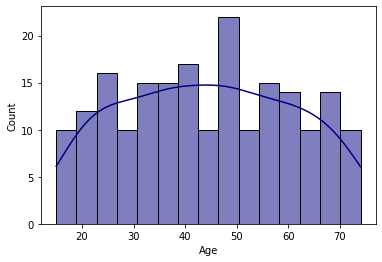

In [11]:
sns.histplot(data=drugs['Age'], bins=15, kde=True, color='navy')
plt.show()

<H4> Sodium to potassium ratio (Na_to_K):</H4>
A quantitative continous value with following central tendency data:

In [12]:
print("Mean Na/K ratio:", round(np.mean(drugs['Na_to_K']), 1))

Mean Na/K ratio: 16.1


In [13]:
print("Median Na/K ratio:", round(np.median(drugs['Na_to_K']), 1))

Median Na/K ratio: 13.9


In [14]:
print("Maksimum Na/K ratio:", round(np.max(drugs['Na_to_K']), 1))

Maksimum Na/K ratio: 38.2


Mean and median are differing, so probably the distribution is skewed (mean higher than median indicate that the distribution is right skewed). In order to evaluate this, a corresponding histogram was prepared. 

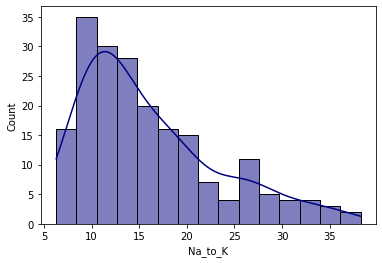

In [15]:
sns.histplot(data=drugs['Na_to_K'], bins=15, kde=True, color='navy')
plt.show()

- Most patients have relatively low Na/K ratio, histogram is right skewed. 

- Median is 13.9, whereas maximum value is 38.2 (almost three times higher that median). 

- Sodium/potassium ratio is associated with the blood pressure, it is related to the potential of sodium to increase and potassium to decrease BP. It is a possibility that Na_to_K and BP variables are mutually dependent.

<h3> Categorical values </h3> 

There are three explanatory categorical values: 
- sex,
- blood pressure (BP) and
- cholesterol level.

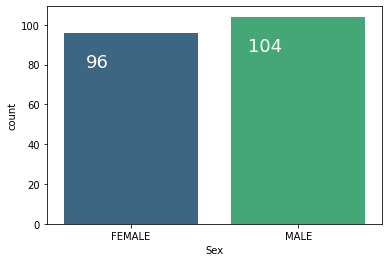

In [16]:
ax = plt.subplot()
sns.countplot(data = drugs, x=drugs['Sex'], palette='viridis')
ax.set_xticklabels(['FEMALE', 'MALE'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In the analyzed dataset a slightly more data is registered for men than women.

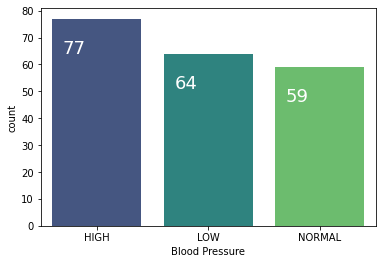

In [17]:
ax = plt.subplot()
sns.countplot(data = drugs, x=drugs['BP'], palette = 'viridis')
plt.xlabel('Blood Pressure')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

The biggest group of patients included in the dataset have high blood pressure (77), in the second place is the group of patients with low pressure (64), and the smallest group (59) are patients with normal pressure. 

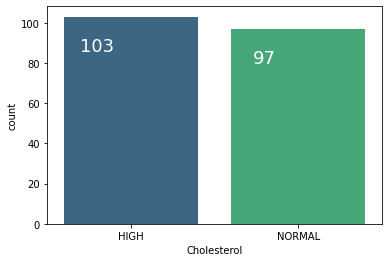

In [18]:
ax = plt.subplot()
sns.countplot(data = drugs, x=drugs['Cholesterol'], palette = 'viridis')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

Slightly more patients (103) have high cholesterol, than normal (97).

The target value - drug type - is also a categorical value, it is composed of five categories:

In [19]:
drugs['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

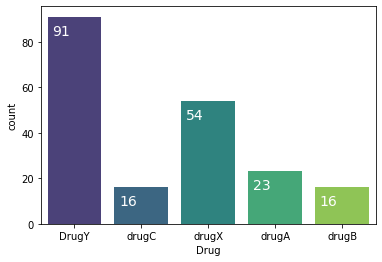

In [20]:
ax = plt.subplot()
sns.countplot(data = drugs, x=drugs['Drug'], palette='viridis')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+4), ha='center', va='top', color='white', size=14)

<H2> Bivariate analysis </H2>

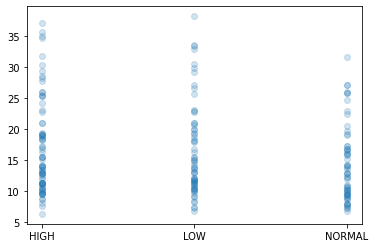

In [21]:
plt.scatter(drugs['BP'],drugs['Na_to_K'], alpha=0.2)

As it was mentioned above, there may be a relation of Na/K ratio and blood pressure. Hovewer, in the analyzed dataset this kind of dependence was not detected. As it can be seen on the above figure, both groups of patients with low and high pressure have also high Na/K ratio. Only in the case of people having normal BP, Na/K ratio has smaller values. This little unusual outcome may be related to the bin sizes or the overall size of dataset (only 200 observations, less data for normal BP). It would be interesting to compare BP groups and its relation with Na/K ratio in more detailed way.   

In [22]:
df_high_BP=drugs[drugs['BP'] == 'HIGH']

In [23]:
df_low_BP=drugs[drugs['BP'] == 'LOW']
df_normal_BP=drugs[drugs['BP'] == 'NORMAL']

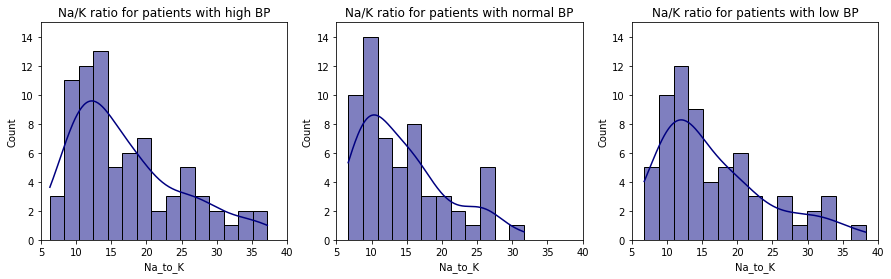

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(data=df_high_BP['Na_to_K'], bins=15, kde=True, color='navy')
plt.ylim([0, 15])
plt.xlim([5, 40])
plt.title('Na/K ratio for patients with high BP')
plt.subplot(1,3,2)
sns.histplot(data=df_normal_BP['Na_to_K'], bins=12, kde=True, color='navy')
plt.ylim([0, 15])
plt.xlim([5, 40])
plt.title('Na/K ratio for patients with normal BP')
plt.subplot(1,3,3)
sns.histplot(data=df_low_BP['Na_to_K'], bins=15, kde=True, color='navy')
plt.title('Na/K ratio for patients with low BP')
plt.ylim([0, 15])
plt.xlim([5, 40])
plt.show()

In this dataset, patients with normal blood pressure tend to have a slightly lower Na/K ratio than patients with low and high BP.

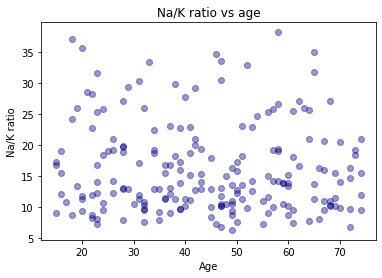

In [25]:
plt.scatter(drugs['Age'],drugs['Na_to_K'], alpha=0.4, color='navy')
plt.xlabel('Age')
plt.ylabel('Na/K ratio')
plt.title('Na/K ratio vs age')
plt.show()

Na/K ratio is similarly distributed in all age groups included in the dataset.

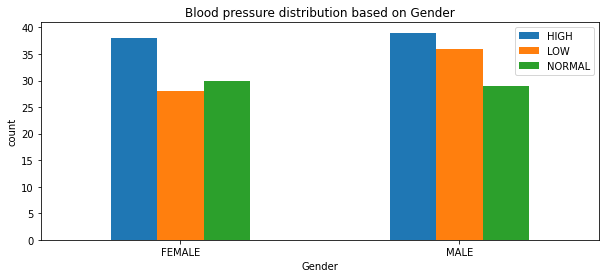

In [26]:
pd.crosstab(drugs['Sex'],drugs['BP']).plot(kind='bar', figsize=(10,4))
ax=plt.subplot()
ax.set_xticklabels(['FEMALE', 'MALE'], rotation = 0)
plt.title('Blood pressure distribution based on Gender')
plt.ylabel('count')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.show()

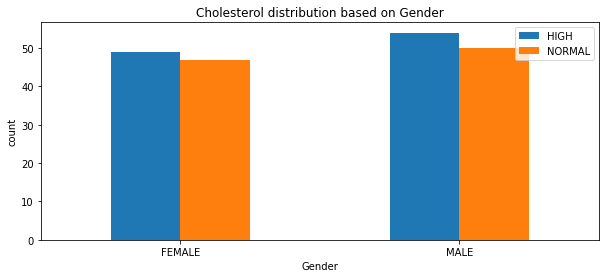

In [27]:
pd.crosstab(drugs['Sex'],drugs['Cholesterol']).plot(kind='bar', figsize=(10,4))
ax=plt.subplot()
ax.set_xticklabels(['FEMALE', 'MALE'], rotation = 0)
plt.title('Cholesterol distribution based on Gender')
plt.ylabel('count')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.show()

In this dataset both blood pressure and cholesterol variables are similarly distributed for males and females. 

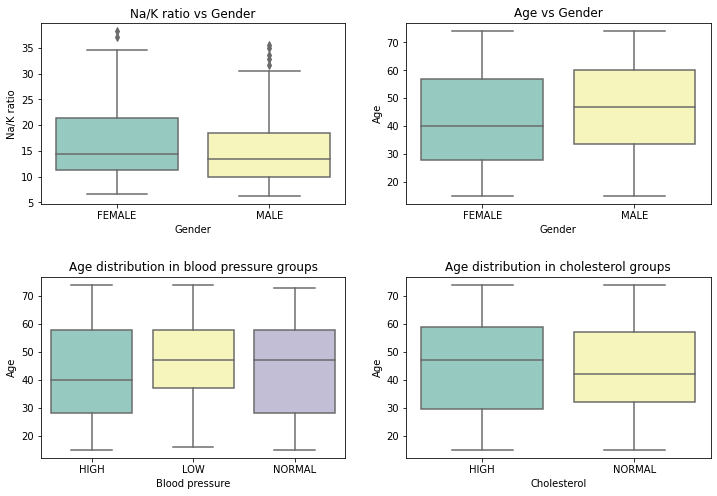

In [28]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.4)
ax0=plt.subplot(2,2,1)
sns.boxplot(x=drugs['Sex'],y=drugs['Na_to_K'], palette='Set3')
plt.title('Na/K ratio vs Gender')
plt.xlabel('Gender')
plt.ylabel('Na/K ratio')
ax0.set_xticklabels(['FEMALE', 'MALE'], rotation = 0)
ax1=plt.subplot(2,2,2)
sns.boxplot(x=drugs['Sex'],y=drugs['Age'], palette='Set3')
plt.title('Age vs Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
ax1.set_xticklabels(['FEMALE', 'MALE'], rotation = 0)
plt.subplot(2,2,3)
sns.boxplot(x=drugs['BP'],y=drugs['Age'], palette='Set3')
plt.title('Age distribution in blood pressure groups')
plt.xlabel('Blood pressure')
plt.ylabel('Age')
plt.subplot(2,2,4)
sns.boxplot(x=drugs['Cholesterol'],y=drugs['Age'], palette='Set3')
plt.title('Age distribution in cholesterol groups')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In this dataset:
- females tend to have slightly higher Na/K ratio than males,
- males are a bit older,
- suprisingly, high blood pressure have slightly younger people than normal and low,
- older people have higher cholesterol than younger. 

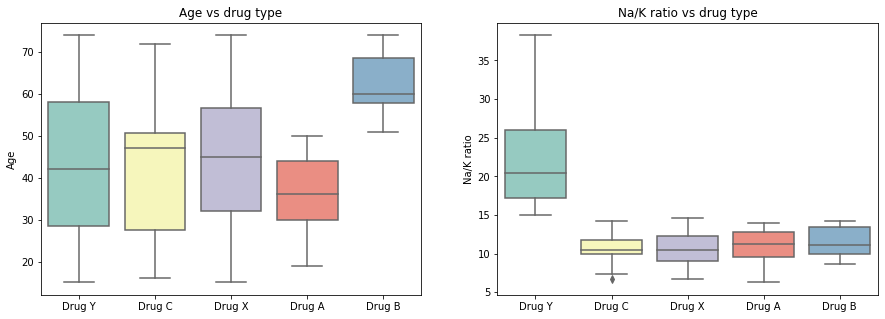

In [29]:
plt.figure(figsize=(15,5))
ax0=plt.subplot(1,2,1)
sns.boxplot(x=drugs['Drug'],y=drugs['Age'], palette='Set3')
plt.title('Age vs drug type')
plt.xlabel('')
plt.ylabel('Age')
ax0.set_xticklabels(['Drug Y', 'Drug C', 'Drug X', 'Drug A', 'Drug B'])
ax1=plt.subplot(1,2,2)
sns.boxplot(x=drugs['Drug'],y=drugs['Na_to_K'], palette='Set3')
plt.title('Na/K ratio vs drug type')
plt.xlabel('')
plt.ylabel('Na/K ratio')
ax1.set_xticklabels(['Drug Y', 'Drug C', 'Drug X', 'Drug A', 'Drug B'])
plt.show()

- Drug B is prescribed to patients of age above 50.
- Drug Y is prescribed to patients having Na/K ratio higher then 15.

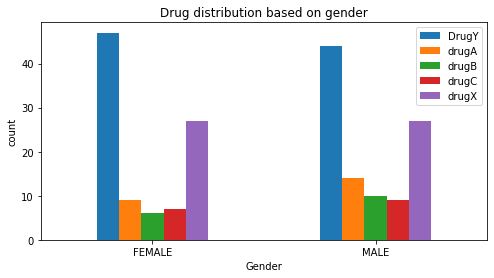

In [30]:
pd.crosstab(drugs['Sex'], drugs['Drug']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['FEMALE', 'MALE'], rotation = 0)
plt.title('Drug distribution based on gender')
plt.ylabel('count')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.show()

- All types of drug is prescribed to both sexes.

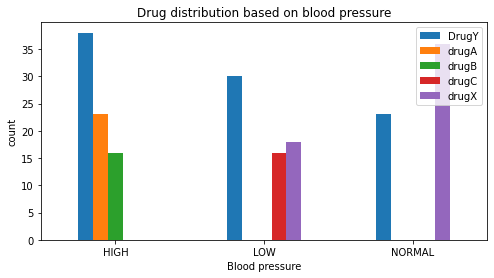

In [31]:
pd.crosstab(drugs['BP'], drugs['Drug']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['HIGH', 'LOW', 'NORMAL'], rotation = 0)
plt.title('Drug distribution based on blood pressure')
plt.ylabel('count')
plt.xlabel('Blood pressure')
plt.legend(loc='best')
plt.show()

- Drug Y is prescribed independently from the blood pressure.
- Drug A and Drug B are prescribed for patients with high blood pressure.
- Drug C is prescribed for patients with low blood pressure.
- Drug X is prescribed for patients with low and normal blood pressure.

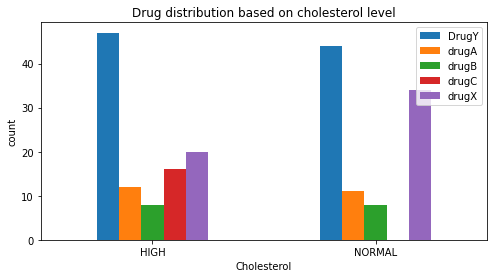

In [32]:
pd.crosstab(drugs['Cholesterol'], drugs['Drug']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['HIGH', 'NORMAL'], rotation = 0)
plt.title('Drug distribution based on cholesterol level')
plt.ylabel('count')
plt.xlabel('Cholesterol')
plt.legend(loc='upper right')
plt.show()

- Drug C is prescribed for patients with high levels of cholesterol.
- Drug X is prescribed more often for patients with normal cholesterol levels than high.
- Drugs Y, A and B are prescribed similarly for both high and normal cholesterol level patients.

<H2> Data preprocessing </H2>

The following models will be used for the classifiation:
- multinomial logistic regression,
- kNN
- decision tree.

In [33]:
drugs = drugs[['Sex', 'BP', 'Cholesterol', 'Age', 'Na_to_K', 'Drug']]
drugs.head()

,Sex,BP,Cholesterol,Age,Na_to_K,Drug
0,F,HIGH,HIGH,23,25.355,DrugY
1,M,LOW,HIGH,47,13.093,drugC
2,M,LOW,HIGH,47,10.114,drugC
3,F,NORMAL,HIGH,28,7.798,drugX
4,F,LOW,HIGH,61,18.043,DrugY


<H3> Splitting data </H3> 

- Firstly a two datasets containing independent variables and labels (target column) need to be prapared. In this case X will be the independent variables datatset and Y will be the target column

In [34]:
X = drugs.iloc[:, 0:-1]
Y = drugs.iloc[:, -1:]

In [35]:
X.head()

,Sex,BP,Cholesterol,Age,Na_to_K
0,F,HIGH,HIGH,23,25.355
1,M,LOW,HIGH,47,13.093
2,M,LOW,HIGH,47,10.114
3,F,NORMAL,HIGH,28,7.798
4,F,LOW,HIGH,61,18.043


In [36]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


<H3> Standardizing the quantitative variables </H3>

Because the quantitative varables have similar scale I will not normalize the data.

In [37]:
print('Age variable ranges from ' + str(min(drugs['Age'])) + ' to ' + str(max(drugs['Age'])))

Age variable ranges from 15 to 74


In [38]:
print('Na/K ratio variable ranges from ' + str(min(drugs['Na_to_K'])) + ' to ' + str(max(drugs['Na_to_K'])))

Na/K ratio variable ranges from 6.269 to 38.247


<H3>Dummy variables</H3>

In order to deal with categorical variables, they will be changed into dummy variables (each category for a given variable will obtain it's binary identifier).

In [39]:
X = pd.get_dummies(X)
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


<H3> Label inbalance </H3>

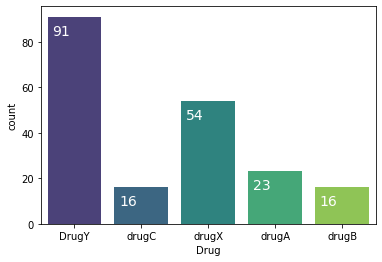

In [78]:
ax = plt.subplot()
sns.countplot(data = drugs, x=drugs['Drug'], palette='viridis')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+4), ha='center', va='top', color='white', size=14)

A dataset is imbalanced when the classification categories are not approximately equally represented, what is the case of our dataset. In order to overcome this problem, two methods are commonly used: undersampling and oversampling. In case of undersampling some data are randomly removed - because the analyzed dataset is small, this technique won't be used. In case of oversampling, a SMOTE (Synthetic Minority Over-sampling Technique) method can be used used; in this method samples from smaller categories are synthetically prepared. 

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X, Y = SMOTE().fit_resample(X, Y)

In [43]:
Y.value_counts()

Drug 
DrugY    91
drugA    91
drugB    91
drugC    91
drugX    91
dtype: int64

In [44]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


<H3> Train/Test split </H3>

In [45]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [46]:
print(len(Y_train),len(Y_test))

341 114


<H3> Logisic regression </H3>
- because there are more than two categories into which data will be classified, a use multinomial logistic regression needs to be used.

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr_model = LogisticRegression(multi_class="multinomial", max_iter=5000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

<H3> Model accuracy </H3>

In [49]:
lr_predictions = lr_model.predict(X_train)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

       DrugY       1.00      0.98      0.99        66
       drugA       1.00      1.00      1.00        69
       drugB       0.97      1.00      0.99        68
       drugC       1.00      1.00      1.00        70
       drugX       1.00      0.99      0.99        68

    accuracy                           0.99       341
   macro avg       0.99      0.99      0.99       341
weighted avg       0.99      0.99      0.99       341



- Accuracy - correct values divided by total values.
- Precision - True Positives divided by the sum of True Positives and False Negatives (true positives divided by the actual positive values).
- Recall - True Positives divided by the sum of True Positives and False Positives (true positives divided by the positive guesses).
- F1-score - blended score of precision and recall which balances both values.
- Macro Avg - unweighted mean value of precision and recall.
- Weighted Avg - weighted mean value of precision and recall by the support values for each class.
- Support - number of observations in class to predict.

(description from Codecademy.com materials)

<H3> Model testing </H3>

In [51]:
lr_pred = lr_model.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        25
       drugA       0.96      1.00      0.98        22
       drugB       0.96      1.00      0.98        23
       drugC       1.00      1.00      1.00        21
       drugX       1.00      0.91      0.95        23

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [52]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(lr_pred,Y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 97.37%


<H3> k-Nearest Neighbors model </H3>
<H3> Model accuracy</H3>

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
accuracies = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies.append(classifier.score(X_train, Y_train))

In [55]:
k_list = range(1,30)

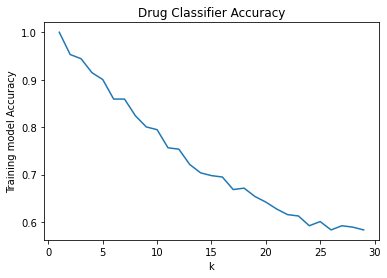

In [56]:
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

<H3> Model testing</H3>

In [57]:
accuracies_test = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies_test.append(classifier.score(X_test,Y_test))

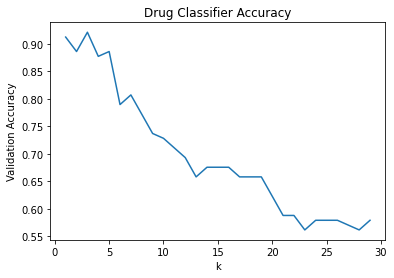

In [58]:
plt.plot(k_list, accuracies_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

For the further analysis I will use 3 neighbors:
- using only one neighbor can lead to overfitted model,
- this is the second maximum in our accuracy vs. k plot.

In [59]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

In [60]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        25
       drugA       0.92      1.00      0.96        22
       drugB       0.88      1.00      0.94        23
       drugC       0.91      1.00      0.95        21
       drugX       0.94      0.65      0.77        23

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [61]:
kNNAcc = accuracy_score(knn_pred,Y_test)
print('kNN model accuracy is: {:.2f}%'.format(kNNAcc*100))

kNN model accuracy is: 92.11%


<H3> Improving kNN model accuracy</H3>
- there is a possibillity, that kNN model feeded with standardized data will perform better.

Normalizing the dataset with the StandardScaler.

In [62]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [63]:
from sklearn.preprocessing import StandardScaler
X_temp = StandardScaler().fit_transform(X.iloc[:,:2])

X_temp = pd.DataFrame(data=X_temp, columns=["Age", "Na_to_K"])
X_temp.head()

,Age,Na_to_K
0,-1.405610,2.185142
1,0.084465,-0.027482
2,0.084465,-0.565029
3,-1.095178,-0.982941
4,0.953675,0.865724


In [64]:
X_norm = pd.concat([X.iloc[:,2:], X_temp], axis=1, join='outer')
X_norm.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age,Na_to_K
0,1,0,1,0,0,1,0,-1.405610,2.185142
1,0,1,0,1,0,1,0,0.084465,-0.027482
2,0,1,0,1,0,1,0,0.084465,-0.565029
3,1,0,0,0,1,1,0,-1.095178,-0.982941
4,1,0,0,1,0,1,0,0.953675,0.865724


In [65]:
Xn_train, Xn_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.25, random_state = 42)
Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [66]:
accuracies_norm = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(Xn_train, Y_train)
    accuracies_norm.append(classifier.score(Xn_train, Y_train))

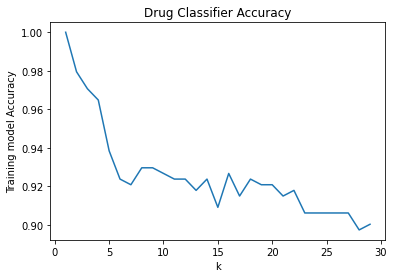

In [67]:
plt.plot(k_list, accuracies_norm)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

In [68]:
accuracies_norm_test = []
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(Xn_train, Y_train)
    accuracies_norm_test.append(classifier.score(Xn_test,Y_test))

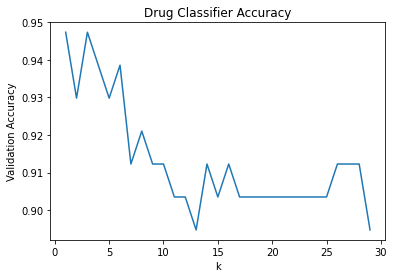

In [69]:
plt.plot(k_list, accuracies_norm_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

In [79]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(Xn_train, Y_train)
knn_pred = knn_model.predict(Xn_test)

In [80]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

       DrugY       1.00      0.80      0.89        25
       drugA       1.00      1.00      1.00        22
       drugB       0.92      1.00      0.96        23
       drugC       0.95      1.00      0.98        21
       drugX       0.88      0.96      0.92        23

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [81]:
kNNAcc = accuracy_score(knn_pred,Y_test)
print('kNN model accuracy is: {:.2f}%'.format(kNNAcc*100))

kNN model accuracy is: 94.74%


In case of kNN normalized data worked slightly better than not normalized indicating, that normalization allowed for better separation of samples.

<H3>Decision tree </H3>

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state = 42, max_depth=4)
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
predictions = tree_model.predict(X_test)

In [75]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        25
       drugA       1.00      1.00      1.00        22
       drugB       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00        21
       drugX       1.00      0.96      0.98        23

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [76]:
TreeAcc = accuracy_score(predictions,Y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 99.12%


In [77]:
#from sklearn import tree

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(tree_model, 
#                   feature_names=X.columns,  
#                   class_names=['DrugY', 'DrugA', 'DrugB', 'drugC', 'drugX'],
#                   filled=True)

Decision Tree with possible explanation:
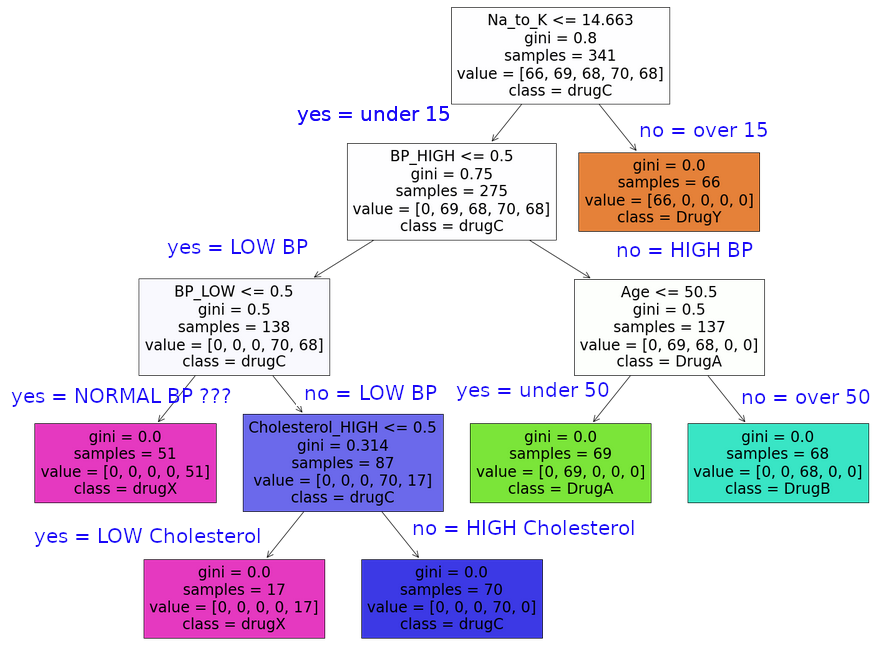

According to our model:
- patients with Na/K ratio over 14.7 - get DrugY,
- patients having Na/K ratio below 14.7, with HIGH BP and older than 50 - get DrugB,
- patients having Na/K ratio below 14.7, with HIGH BP and younger than 50 - get DrugA,
- patients having Na/K ratio below 14.7, with NORMAL BP get DrugX,
- patients having Na/K ratio below 14.7, with LOW BP and LOW Cholesterol get also DrugX,
- patients having Na/K ratio below 14.7, with LOW BP and HIGH Cholesterol get DrugC.